In [1]:
import tensorflow as tf
from keras import utils
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
import numpy as np

In [2]:
(x_train, train_label), (x_test, test_label) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
import cv2
train_data = []
for img in x_train:
  resized_img = cv2.resize(img, (224, 224))
  train_data.append(resized_img)
test_data = []
for img in x_test:
  resized_img = cv2.resize(img, (224, 224))
  test_data.append(resized_img)

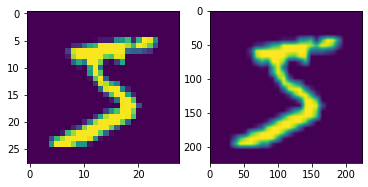

In [4]:
import matplotlib.pyplot as plt
fig, axarr = plt.subplots(1, 2)
axarr[0].imshow(x_train[0])
axarr[1].imshow(train_data[0])

In [5]:
train_data=np.array(train_data)
test_data=np.array(test_data)
train_data = train_data.reshape(train_data.shape[0], 224, 224, 1)
test_data = test_data.reshape(test_data.shape[0], 224, 224, 1)
train_label = to_categorical(train_label, num_classes=10)
test_label = to_categorical(test_label, num_classes=10)

In [6]:
y_train = to_categorical(train_label, 10)
y_test = to_categorical(test_label, 10)

In [7]:
print(train_data.shape)

(60000, 224, 224, 1)


# VGG11

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(64, (3, 3),strides=(1,1),padding='same', activation='relu', input_shape=(224, 224, 1),name='Conv1_1'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),strides=(2,2),name='Pool1'))
model.add(tf.keras.layers.BatchNormalization(name='Norn1'))

model.add(tf.keras.layers.Conv2D(128, (3, 3),strides=(1,1),padding='same', activation='relu',name='Conv2_1'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),strides=(2,2),name='Pool2'))
model.add(tf.keras.layers.BatchNormalization(name='Norn2'))

model.add(tf.keras.layers.Conv2D(256, (3, 3),strides=(1,1),padding='same', activation='relu',name='Conv3_1'))
model.add(tf.keras.layers.Conv2D(256, (1, 1),strides=(1,1),padding='same', activation='relu',name='Conv3_2'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),strides=(2,2),name='Pool3'))
model.add(tf.keras.layers.BatchNormalization(name='Norn3'))

model.add(tf.keras.layers.Conv2D(512, (3, 3),strides=(1,1),padding='same', activation='relu',name='Conv4_1'))
model.add(tf.keras.layers.Conv2D(512, (1, 1),strides=(1,1),padding='same', activation='relu',name='Conv4_2'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),strides=(2,2),name='Pool4'))
model.add(tf.keras.layers.BatchNormalization(name='Norn4'))

model.add(tf.keras.layers.Conv2D(512, (3, 3),strides=(1,1),padding='same', activation='relu',name='Conv5_1'))
model.add(tf.keras.layers.Conv2D(512, (3, 3),strides=(1,1),padding='same', activation='relu',name='Conv5_2'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),strides=(2,2),name='Pool5'))
model.add(tf.keras.layers.BatchNormalization(name='Norn5'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4096, activation='relu',name='FC4'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(4096, activation='relu',name='FC5'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax',name='FC6'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1_1 (Conv2D)             (None, 224, 224, 64)      640       
_________________________________________________________________
Pool1 (MaxPooling2D)         (None, 112, 112, 64)      0         
_________________________________________________________________
Norn1 (BatchNormalization)   (None, 112, 112, 64)      256       
_________________________________________________________________
Conv2_1 (Conv2D)             (None, 112, 112, 128)     73856     
_________________________________________________________________
Pool2 (MaxPooling2D)         (None, 56, 56, 128)       0         
_________________________________________________________________
Norn2 (BatchNormalization)   (None, 56, 56, 128)       512       
_________________________________________________________________
Conv3_1 (Conv2D)             (None, 56, 56, 256)      

In [ ]:
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
      loss='categorical_crossentropy',
      metrics=["accuracy"])

history = model.fit(
    train_data,
    train_label,
    batch_size=200,
    validation_split=0.3,
    epochs=10)


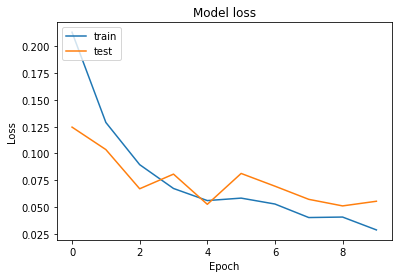

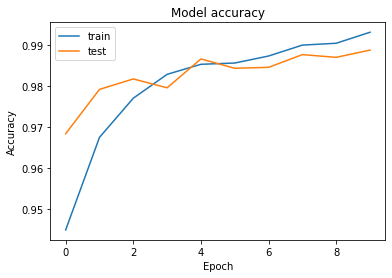

In [ ]:
import matplotlib.pyplot as plt
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','test'], loc='upper left')
plt.show()

import matplotlib.pyplot as plt2
plt2.title('Model accuracy')
plt2.ylabel('Accuracy')
plt2.xlabel('Epoch')
plt2.plot(history.history['accuracy'])
plt2.plot(history.history['val_accuracy'])
plt2.legend(['train','test'], loc='upper left')
plt2.show()

#VGG13

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(64, (3, 3),strides=(1,1),padding='same', activation='relu', input_shape=(224, 224, 1),name='Conv1_1'))
model.add(tf.keras.layers.Conv2D(64, (3, 3),strides=(1,1),padding='same', activation='relu',name='Conv1_2'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),strides=(2,2),name='Pool1'))
model.add(tf.keras.layers.BatchNormalization(name='Norn1'))

model.add(tf.keras.layers.Conv2D(128, (3, 3),strides=(1,1),padding='same', activation='relu',name='Conv2_1'))
model.add(tf.keras.layers.Conv2D(128, (3, 3),strides=(1,1),padding='same', activation='relu',name='Conv2_2'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),strides=(2,2),name='Pool2'))
model.add(tf.keras.layers.BatchNormalization(name='Norn2'))

model.add(tf.keras.layers.Conv2D(256, (3, 3),strides=(1,1),padding='same', activation='relu',name='Conv3_1'))
model.add(tf.keras.layers.Conv2D(256, (3, 3),strides=(1,1),padding='same', activation='relu',name='Conv3_2'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),strides=(2,2),name='Pool3'))
model.add(tf.keras.layers.BatchNormalization(name='Norn3'))

model.add(tf.keras.layers.Conv2D(512, (3, 3),strides=(1,1),padding='same', activation='relu',name='Conv4_1'))
model.add(tf.keras.layers.Conv2D(512, (3, 3),strides=(1,1),padding='same', activation='relu',name='Conv4_2'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),strides=(2,2),name='Pool4'))
model.add(tf.keras.layers.BatchNormalization(name='Norn4'))

model.add(tf.keras.layers.Conv2D(512, (3, 3),strides=(1,1),padding='same', activation='relu',name='Conv5_1'))
model.add(tf.keras.layers.Conv2D(512, (3, 3),strides=(1,1),padding='same', activation='relu',name='Conv5_2'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),strides=(2,2),name='Pool5'))
model.add(tf.keras.layers.BatchNormalization(name='Norn5'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4096, activation='relu',name='FC4'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(4096, activation='relu',name='FC5'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax',name='FC6'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1_1 (Conv2D)             (None, 224, 224, 64)      640       
_________________________________________________________________
Conv1_2 (Conv2D)             (None, 224, 224, 64)      36928     
_________________________________________________________________
Pool1 (MaxPooling2D)         (None, 112, 112, 64)      0         
_________________________________________________________________
Norn1 (BatchNormalization)   (None, 112, 112, 64)      256       
_________________________________________________________________
Conv2_1 (Conv2D)             (None, 112, 112, 128)     73856     
_________________________________________________________________
Conv2_2 (Conv2D)             (None, 112, 112, 128)     147584    
_________________________________________________________________
Pool2 (MaxPooling2D)         (None, 56, 56, 128)       0

In [ ]:
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
      loss='categorical_crossentropy',
      metrics=["accuracy"])

history = model.fit(
    train_data,
    train_label,
    batch_size=100,
    validation_split=0.3,
    epochs=3
    )


Epoch 1/3
420/420 [==============================] - 591s 1s/step - loss: 0.4441 - accuracy: 0.9078 - val_loss: 0.1174 - val_accuracy: 0.9703
Epoch 2/3
420/420 [==============================] - 562s 1s/step - loss: 0.1410 - accuracy: 0.9683 - val_loss: 0.0816 - val_accuracy: 0.9774
Epoch 3/3
420/420 [==============================] - 543s 1s/step - loss: 0.1006 - accuracy: 0.9767 - val_loss: 0.0728 - val_accuracy: 0.9819


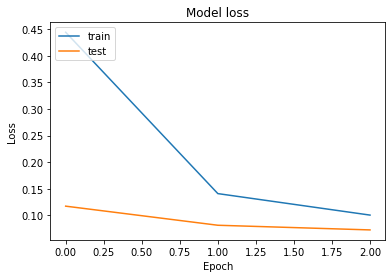

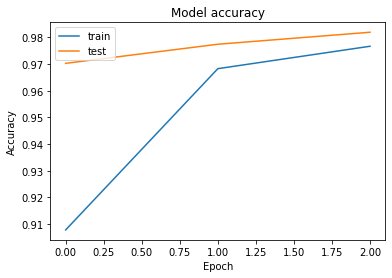

In [ ]:
import matplotlib.pyplot as plt
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','test'], loc='upper left')
plt.show()

import matplotlib.pyplot as plt2
plt2.title('Model accuracy')
plt2.ylabel('Accuracy')
plt2.xlabel('Epoch')
plt2.plot(history.history['accuracy'])
plt2.plot(history.history['val_accuracy'])
plt2.legend(['train','test'], loc='upper left')
plt2.show()

# VGG16

In [8]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(64, (3, 3),strides=(1,1),padding='same', activation='relu', input_shape=(224, 224, 1),name='Conv1_1'))
model.add(tf.keras.layers.Conv2D(64, (3, 3),strides=(1,1),padding='same', activation='relu',name='Con1_2'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),strides=(2,2),name='Pool1'))
model.add(tf.keras.layers.BatchNormalization(name='Norn1'))

model.add(tf.keras.layers.Conv2D(128, (3, 3),strides=(1,1),padding='same', activation='relu',name='Conv2_1'))
model.add(tf.keras.layers.Conv2D(128, (3, 3),strides=(1,1),padding='same', activation='relu',name='Conv2_2'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),strides=(2,2),name='Pool2'))
model.add(tf.keras.layers.BatchNormalization(name='Norn2'))

model.add(tf.keras.layers.Conv2D(256, (3, 3),strides=(1,1),padding='same', activation='relu',name='Conv3_1'))
model.add(tf.keras.layers.Conv2D(256, (3, 3),strides=(1,1),padding='same', activation='relu',name='Conv3_2'))
model.add(tf.keras.layers.Conv2D(256, (3,3),strides=(1,1),padding='same', activation='relu',name='Conv3_3'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),strides=(2,2),name='Pool3'))
model.add(tf.keras.layers.BatchNormalization(name='Norn3'))

model.add(tf.keras.layers.Conv2D(512, (3, 3),strides=(1,1),padding='same', activation='relu',name='Conv4_1'))
model.add(tf.keras.layers.Conv2D(512, (3, 3),strides=(1,1),padding='same', activation='relu',name='Conv4_2'))
model.add(tf.keras.layers.Conv2D(512, (3, 3),strides=(1,1),padding='same', activation='relu',name='Conv4_3'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),strides=(2,2),name='Pool4'))
model.add(tf.keras.layers.BatchNormalization(name='Norn4'))

model.add(tf.keras.layers.Conv2D(512, (3, 3),strides=(1,1),padding='same', activation='relu',name='Conv5_1'))
model.add(tf.keras.layers.Conv2D(512, (3, 3),strides=(1,1),padding='same', activation='relu',name='Conv5_2'))
model.add(tf.keras.layers.Conv2D(512, (3, 3),strides=(1,1),padding='same', activation='relu',name='Conv5_3'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),strides=(2,2),name='Pool5'))
model.add(tf.keras.layers.BatchNormalization(name='Norn5'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4096, activation='relu',name='FC4'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(4096, activation='relu',name='FC5'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax',name='FC6'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1_1 (Conv2D)             (None, 224, 224, 64)      640       
_________________________________________________________________
Con1_2 (Conv2D)              (None, 224, 224, 64)      36928     
_________________________________________________________________
Pool1 (MaxPooling2D)         (None, 112, 112, 64)      0         
_________________________________________________________________
Norn1 (BatchNormalization)   (None, 112, 112, 64)      256       
_________________________________________________________________
Conv2_1 (Conv2D)             (None, 112, 112, 128)     73856     
_________________________________________________________________
Conv2_2 (Conv2D)             (None, 112, 112, 128)     147584    
_________________________________________________________________
Pool2 (MaxPooling2D)         (None, 56, 56, 128)       0

In [9]:
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
      loss='categorical_crossentropy',
      metrics=["accuracy"])

history = model.fit(
    train_data,
    train_label,
    batch_size=100,
    validation_split=0.3,
    epochs=3
    )

Epoch 1/3
420/420 [==============================] - 726s 2s/step - loss: 1.0715 - accuracy: 0.7857 - val_loss: 0.4937 - val_accuracy: 0.8367
Epoch 2/3
420/420 [==============================] - 669s 2s/step - loss: 0.3115 - accuracy: 0.9160 - val_loss: 0.8287 - val_accuracy: 0.7497
Epoch 3/3
420/420 [==============================] - 670s 2s/step - loss: 0.1993 - accuracy: 0.9485 - val_loss: 0.2004 - val_accuracy: 0.9518


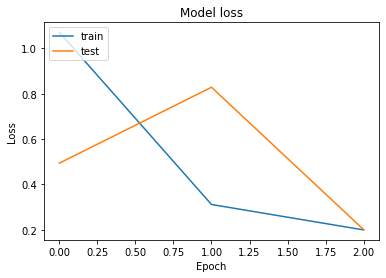

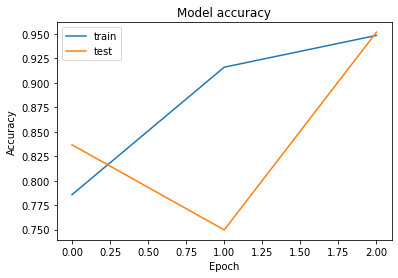

In [10]:
import matplotlib.pyplot as plt
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','test'], loc='upper left')
plt.show()

import matplotlib.pyplot as plt2
plt2.title('Model accuracy')
plt2.ylabel('Accuracy')
plt2.xlabel('Epoch')
plt2.plot(history.history['accuracy'])
plt2.plot(history.history['val_accuracy'])
plt2.legend(['train','test'], loc='upper left')
plt2.show()